In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("House_Price_uk.csv",parse_dates=['date'],dayfirst=True)

In [31]:
df.head()

,price,date,postcode,property_type,new_build,freehold,street,locality,town,district,country
0,735000,2017-08-07,LE17 5AP,D,N,F,CLAYBROOKE COURT,CLAYBROOKE PARVA,LUTTERWORTH,HARBOROUGH,LEICESTERSHIRE
1,160000,2023-02-03,SA11 4BD,T,N,F,GORED COTTAGES,MELINCOURT,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT
2,176500,2015-01-06,ME3 0DQ,S,N,F,GREEN LANE,ISLE OF GRAIN,ROCHESTER,MEDWAY,MEDWAY
3,625000,2021-10-13,RH20 3EU,D,N,F,LINFIELD COPSE,THAKEHAM,PULBOROUGH,HORSHAM,WEST SUSSEX
4,202000,2019-09-27,SN13 8EN,S,N,F,CLYDESDALE ROAD,BOX,CORSHAM,WILTSHIRE,WILTSHIRE


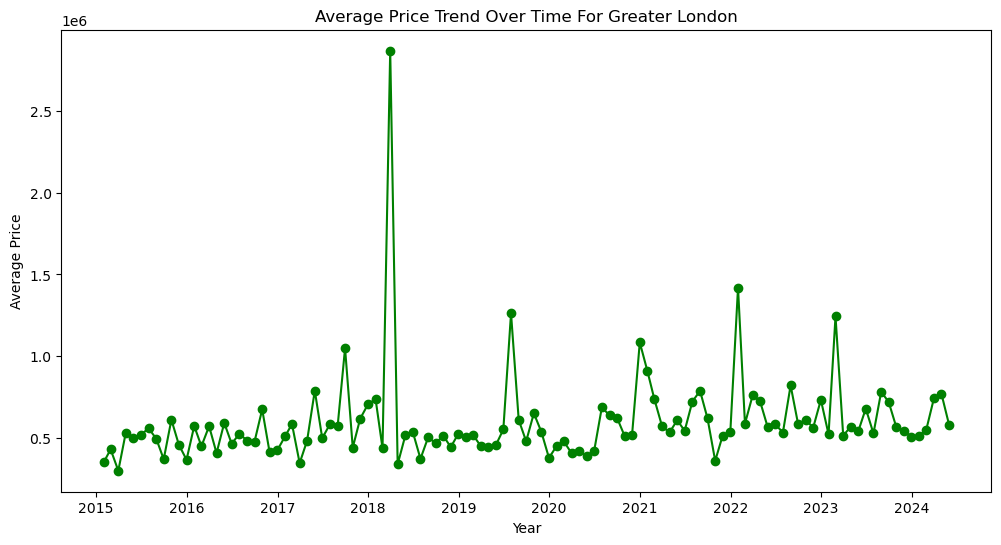

In [32]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
country_choice="GREATER LONDON"
country=df[df['country']== country_choice]
trends = country.resample('M', on='date')['price'].mean().reset_index()
desc_stats = country.describe()
# print("Descriptive Statistics:\n", desc_stats)
plt.figure(figsize=(12, 6))
plt.plot(trends['date'], trends['price'], marker='o', linestyle='-', color='g')
plt.title("Average Price Trend Over Time For Greater London")
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

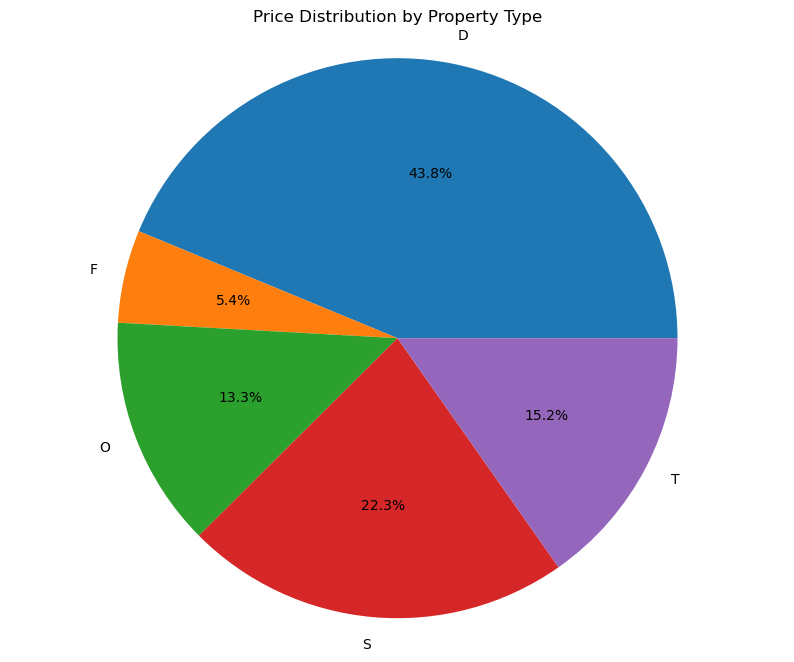

In [33]:
prices = df.groupby('property_type')['price'].sum()
plt.figure(figsize=(10, 8))
plt.pie(prices, labels=prices.index,autopct='%1.1f%%')
plt.title('Price Distribution by Property Type')
plt.axis('equal')
plt.show()

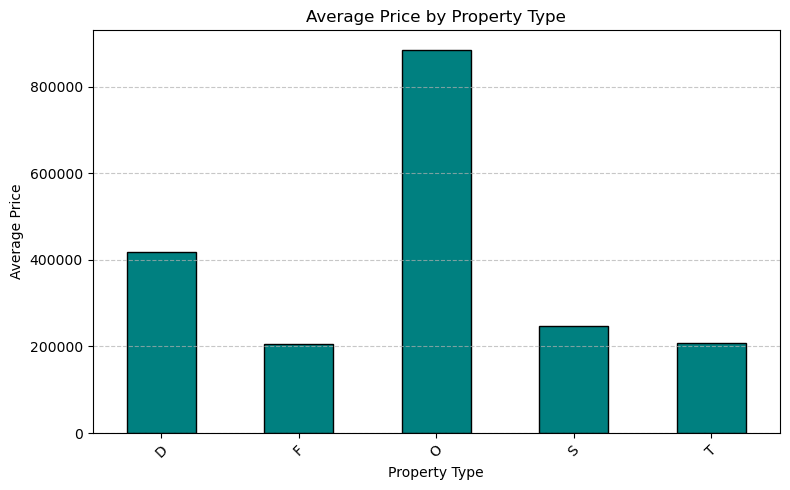

In [34]:
average_price_by_type = df.groupby('property_type')['price'].mean()

# Create the bar chart
plt.figure(figsize=(8, 5))
average_price_by_type.plot(kind='bar', color='teal', edgecolor='black')

# Add titles and labels
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

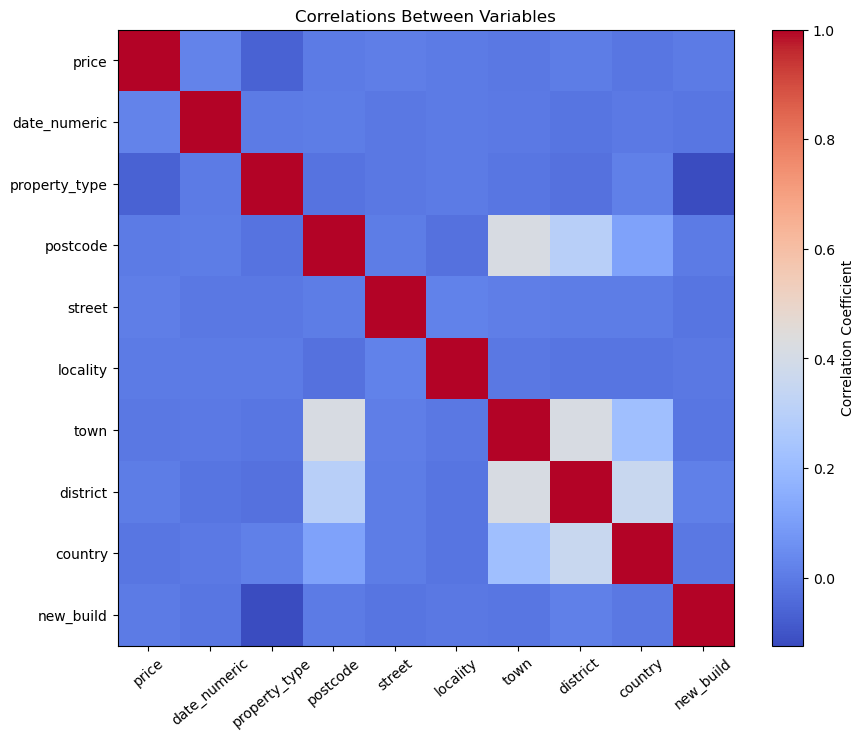

In [35]:
df['date_numeric'] = df['date'].map(pd.Timestamp.toordinal)
categorical_columns = ['property_type', 'postcode', 'street', 'locality', 'town', 'district', 'country','new_build']
df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes
numerical_columns = ['price', 'date_numeric'] + categorical_columns
correlation_matrix = df_encoded[numerical_columns].corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns, rotation=40)
plt.yticks(ticks=np.arange(len(numerical_columns)), labels=numerical_columns)
plt.title('Correlations Between Variables')
plt.show()